In [1]:
#20BHI10028 - TUSHAR MISRA
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data4.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3,1.50,1340,7912,1.5,3,1340,0,1955,2005
1,2384000,5,2.50,3650,9050,2.0,5,3370,280,1921,0
2,342000,3,2.00,1930,11947,1.0,4,1930,0,1966,0
3,420000,3,2.25,2000,8030,1.0,4,1000,1000,1963,0
4,550000,4,2.50,1940,10500,1.0,4,1140,800,1976,1992


Text(0, 0.5, 'price($)')

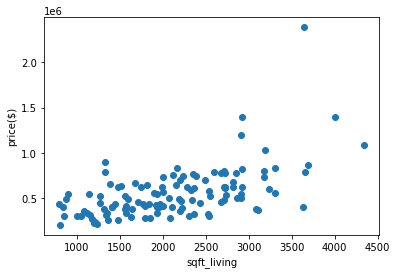

In [3]:
plt.scatter(df.sqft_living,df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price($)')

In [4]:
#Preprocessing using min max scaler

scaler = MinMaxScaler()

scaler.fit(df[['price']])
df['price'] = scaler.transform(df[['price']])

scaler.fit(df[['sqft_living']])
df['sqft_living'] = scaler.transform(df[['sqft_living']])

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.049128,3,1.50,0.152542,7912,1.5,3,1340,0,1955,2005
1,1.000000,5,2.50,0.805085,9050,2.0,5,3370,280,1921,0
2,0.062443,3,2.00,0.319209,11947,1.0,4,1930,0,1966,0
3,0.098255,3,2.25,0.338983,8030,1.0,4,1000,1000,1963,0
4,0.157943,4,2.50,0.322034,10500,1.0,4,1140,800,1976,1992


Text(0, 0.5, 'price($)')

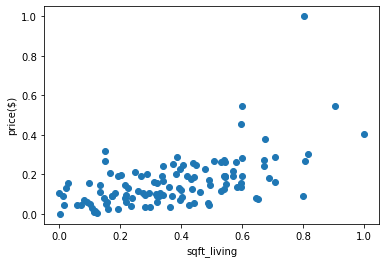

In [6]:
plt.scatter(df.sqft_living,df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price($)')

[0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1]
______________________________________________________________________
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  0.049128         3       1.50     0.152542      7912     1.5          3   
1  1.000000         5       2.50     0.805085      9050     2.0          5   
2  0.062443         3       2.00     0.319209     11947     1.0          4   
3  0.098255         3       2.25     0.338983      8030     1.0          4   
4  0.157943         4       2.50     0.322034     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  cluster  
0        1340              0      1955          2005        0  
1        3370            280      1921             0        1  
2        1930            

Text(0.5, 1.0, '20BHI10028 - When K value is 2')

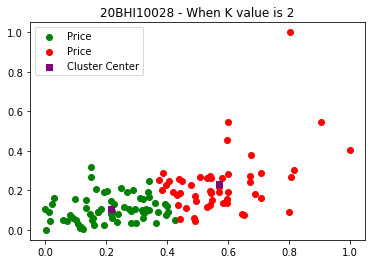

In [7]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['sqft_living','price']])
print(y_predicted)
print("______________________________________________________________________")

df['cluster']=y_predicted
print(df.head())
print("______________________________________________________________________")

print(km.cluster_centers_)
print("______________________________________________________________________")

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.sqft_living,df1['price'],color='green',label="Price")
plt.scatter(df2.sqft_living,df2['price'],color='red',label="Price")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker=',',label='Cluster Center')
plt.legend()

plt.title("20BHI10028 - When K value is 2")

[1 2 1 1 1 1 1 0 0 1 1 2 0 1 2 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 2 0 0 0 1 0 1 0 2 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 2 0 1 0 0 1 1 1 1 2 0 0 0 1 0 1 0 1 2 0 0 1 0 1 0 0 2 1 1 1
 0 1 0 0 1 0 1 2]
______________________________________________________________________
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  0.049128         3       1.50     0.152542      7912     1.5          3   
1  1.000000         5       2.50     0.805085      9050     2.0          5   
2  0.062443         3       2.00     0.319209     11947     1.0          4   
3  0.098255         3       2.25     0.338983      8030     1.0          4   
4  0.157943         4       2.50     0.322034     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  cluster  
0        1340              0      1955          2005        1  
1        3370            280      1921             0        2  
2        1930            

Text(0.5, 1.0, '20BHI10028 - When K value is 3')

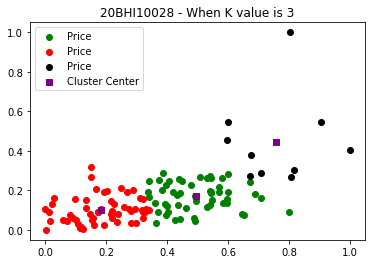

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sqft_living','price']])
print(y_predicted)
print("______________________________________________________________________")

df['cluster']=y_predicted
print(df.head())
print("______________________________________________________________________")

print(km.cluster_centers_)
print("______________________________________________________________________")

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.sqft_living,df1['price'],color='green',label="Price")
plt.scatter(df2.sqft_living,df2['price'],color='red',label="Price")
plt.scatter(df3.sqft_living,df3['price'],color='black',label="Price")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker=',',label='Cluster Center')
plt.legend()

plt.title("20BHI10028 - When K value is 3")

[1 2 0 0 0 1 1 3 0 1 0 2 0 1 3 1 1 3 1 1 0 1 0 3 1 0 0 0 3 3 1 3 0 3 3 3 1
 0 0 0 1 1 1 0 1 1 0 0 1 3 3 3 3 0 0 0 0 3 1 1 3 3 3 0 3 1 1 1 3 0 0 3 0 0
 1 1 0 3 0 3 0 3 3 0 0 0 1 1 1 1 3 0 3 0 1 3 0 3 1 2 3 0 1 0 0 3 0 2 1 1 1
 0 1 3 0 1 0 1 3]
______________________________________________________________________
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  0.049128         3       1.50     0.152542      7912     1.5          3   
1  1.000000         5       2.50     0.805085      9050     2.0          5   
2  0.062443         3       2.00     0.319209     11947     1.0          4   
3  0.098255         3       2.25     0.338983      8030     1.0          4   
4  0.157943         4       2.50     0.322034     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  cluster  
0        1340              0      1955          2005        1  
1        3370            280      1921             0        2  
2        1930            

Text(0.5, 1.0, '20BHI10028 - When K value is 4')

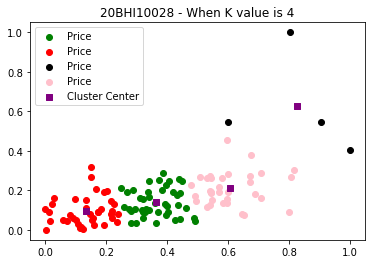

In [9]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['sqft_living','price']])
print(y_predicted)
print("______________________________________________________________________")

df['cluster']=y_predicted
print(df.head())
print("______________________________________________________________________")

print(km.cluster_centers_)
print("______________________________________________________________________")

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.sqft_living,df1['price'],color='green',label="Price")
plt.scatter(df2.sqft_living,df2['price'],color='red',label="Price")
plt.scatter(df3.sqft_living,df3['price'],color='black',label="Price")
plt.scatter(df4.sqft_living,df4['price'],color='pink',label="Price")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker=',',label='Cluster Center')
plt.legend()

plt.title("20BHI10028 - When K value is 4")

[1 3 0 0 0 1 1 2 0 1 0 4 0 1 4 1 1 2 1 1 0 1 0 2 1 0 0 0 2 2 1 2 0 2 2 2 1
 0 0 0 1 1 1 0 1 1 0 0 1 4 2 2 2 0 0 0 0 4 1 1 2 2 2 0 2 1 1 1 2 0 0 2 0 0
 1 1 0 2 0 2 0 4 2 0 0 0 1 1 1 1 2 0 2 0 1 2 0 2 1 4 2 0 1 0 0 2 0 4 1 1 1
 0 1 2 0 1 0 1 4]
______________________________________________________________________
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  0.049128         3       1.50     0.152542      7912     1.5          3   
1  1.000000         5       2.50     0.805085      9050     2.0          5   
2  0.062443         3       2.00     0.319209     11947     1.0          4   
3  0.098255         3       2.25     0.338983      8030     1.0          4   
4  0.157943         4       2.50     0.322034     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  cluster  
0        1340              0      1955          2005        1  
1        3370            280      1921             0        3  
2        1930            

Text(0.5, 1.0, '20BHI10028 - When K value is 5')

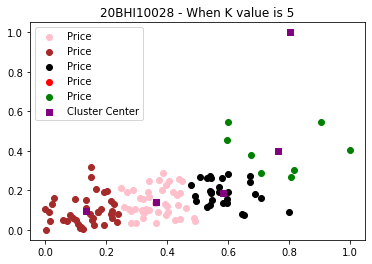

In [10]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['sqft_living','price']])
print(y_predicted)
print("______________________________________________________________________")

df['cluster']=y_predicted
print(df.head())
print("______________________________________________________________________")

print(km.cluster_centers_)
print("______________________________________________________________________")

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1.sqft_living,df1['price'],color='pink',label="Price")
plt.scatter(df2.sqft_living,df2['price'],color='brown',label="Price")
plt.scatter(df3.sqft_living,df3['price'],color='black',label="Price")
plt.scatter(df4.sqft_living,df4['price'],color='red',label="Price")
plt.scatter(df5.sqft_living,df5['price'],color='green',label="Price")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker=',',label='Cluster Center')
plt.legend()

plt.title("20BHI10028 - When K value is 5")

[1 5 4 4 4 1 1 0 0 4 4 2 0 1 2 1 4 2 1 1 0 4 4 2 4 0 0 0 2 2 4 2 4 2 2 2 1
 4 4 0 4 1 1 4 1 1 4 4 1 2 2 2 2 4 0 4 0 3 1 4 2 0 2 0 2 1 4 1 2 0 0 2 0 4
 4 1 0 2 0 0 4 3 0 4 0 0 1 4 1 1 2 0 2 0 4 2 4 2 1 3 2 4 4 0 4 2 0 3 1 1 4
 0 1 0 0 1 0 1 2]
______________________________________________________________________
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  0.049128         3       1.50     0.152542      7912     1.5          3   
1  1.000000         5       2.50     0.805085      9050     2.0          5   
2  0.062443         3       2.00     0.319209     11947     1.0          4   
3  0.098255         3       2.25     0.338983      8030     1.0          4   
4  0.157943         4       2.50     0.322034     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  cluster  
0        1340              0      1955          2005        1  
1        3370            280      1921             0        5  
2        1930            

Text(0.5, 1.0, '20BHI10028 - When K value is 6')

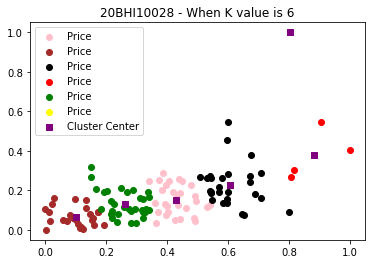

In [11]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df[['sqft_living','price']])
print(y_predicted)
print("______________________________________________________________________")

df['cluster']=y_predicted
print(df.head())
print("______________________________________________________________________")

print(km.cluster_centers_)
print("______________________________________________________________________")

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.scatter(df1.sqft_living,df1['price'],color='pink',label="Price")
plt.scatter(df2.sqft_living,df2['price'],color='brown',label="Price")
plt.scatter(df3.sqft_living,df3['price'],color='black',label="Price")
plt.scatter(df4.sqft_living,df4['price'],color='red',label="Price")
plt.scatter(df5.sqft_living,df5['price'],color='green',label="Price")
plt.scatter(df6.sqft_living,df6['price'],color='yellow',label="Price")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker=',',label='Cluster Center')
plt.legend()

plt.title("20BHI10028 - When K value is 6")

[3 2 6 6 6 3 3 0 6 1 1 5 4 3 5 3 1 0 3 3 4 1 1 0 1 6 4 4 0 4 1 0 1 0 0 0 3
 6 6 4 1 3 3 1 3 3 6 6 3 5 0 0 4 6 6 6 6 5 3 1 0 0 0 6 0 3 1 3 4 6 6 0 4 6
 1 1 4 4 4 4 6 5 4 1 6 6 3 1 1 3 0 4 0 4 1 0 1 0 1 5 0 6 1 6 6 0 6 5 3 3 1
 6 3 4 4 3 6 3 5]
______________________________________________________________________
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  0.049128         3       1.50     0.152542      7912     1.5          3   
1  1.000000         5       2.50     0.805085      9050     2.0          5   
2  0.062443         3       2.00     0.319209     11947     1.0          4   
3  0.098255         3       2.25     0.338983      8030     1.0          4   
4  0.157943         4       2.50     0.322034     10500     1.0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  cluster  
0        1340              0      1955          2005        3  
1        3370            280      1921             0        2  
2        1930            

Text(0.5, 1.0, '20BHI10028 - When K value is 6')

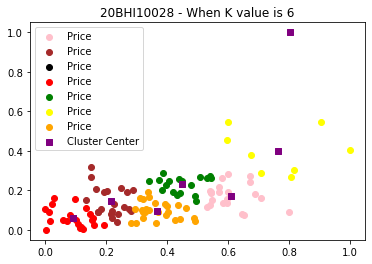

In [12]:
km = KMeans(n_clusters=7)
y_predicted = km.fit_predict(df[['sqft_living','price']])
print(y_predicted)
print("______________________________________________________________________")

df['cluster']=y_predicted
print(df.head())
print("______________________________________________________________________")

print(km.cluster_centers_)
print("______________________________________________________________________")

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]

plt.scatter(df1.sqft_living,df1['price'],color='pink',label="Price")
plt.scatter(df2.sqft_living,df2['price'],color='brown',label="Price")
plt.scatter(df3.sqft_living,df3['price'],color='black',label="Price")
plt.scatter(df4.sqft_living,df4['price'],color='red',label="Price")
plt.scatter(df5.sqft_living,df5['price'],color='green',label="Price")
plt.scatter(df6.sqft_living,df6['price'],color='yellow',label="Price")
plt.scatter(df7.sqft_living,df7['price'],color='orange',label="Price")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker=',',label='Cluster Center')
plt.legend()

plt.title("20BHI10028 - When K value is 6")

In [16]:
#Elbow Plot

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sqft_living','price']])
    sse.append(km.inertia_)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, '20BHI10028 - Elbow Plot for K = 2 to 14')

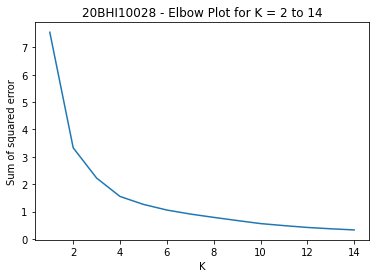

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.title("20BHI10028 - Elbow Plot for K = 2 to 14")